In [1]:
%cd ..
%cd ..
%cd ..

/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/notebooks/UF23
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/notebooks
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs


/home/flandgraf/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [11]:
from gammaALPs.core import Source, ALP, ModuleList
import numpy as np
import matplotlib.pyplot as plt

In [4]:
src = Source(z=0.02, l=12., b=12.)
m = 1.
g = 0.5
alp = ALP(m, g)

In [5]:
EGeV = np.logspace(-1., 3., 101)
pa_in = np.diag([0., 0., 1.])

ml = ModuleList(alp, src, pin=pa_in, EGeV=EGeV)

In [6]:
ml.add_propagation("GMF", 0, model="UF23", UF23_model="base")


environs.py:1207 --- INFO: Using inputted chi


In [7]:
px, py, pa = ml.run()

   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:799: UserWarning: Not all values of linear polarization are real values!
  warnings.warn("Not all values of linear polarization are real values!")
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:802: UserWarning: Not all values of circular polarization are real values!
  warnings.warn("Not all values of circular polarization are real values!")


In [9]:
px_in = np.diag([1., 0., 0.])
py_in = np.diag([0., 1., 0.])

prx = ml.modules["GMF"].show_conv_prob_vs_r(pa_in, px_in)
pry = ml.modules["GMF"].show_conv_prob_vs_r(pa_in, py_in)
pra = ml.modules["GMF"].show_conv_prob_vs_r(pa_in, pa_in)

Energy: 3.981071705534973 GeV


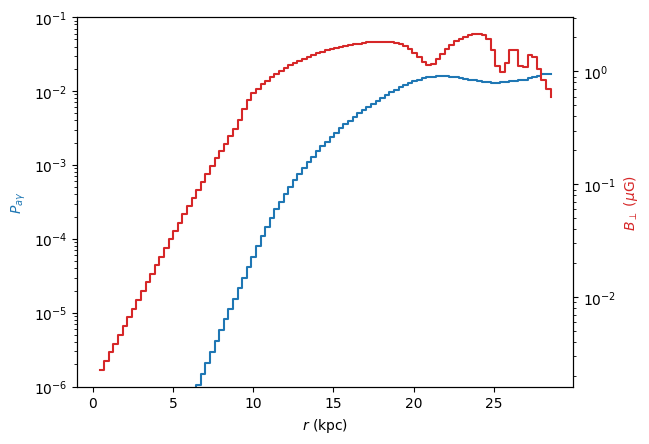

In [18]:
idx = 40
print ("Energy:", EGeV[idx], "GeV")

ax = plt.subplot(111)
ax.semilogy(ml.modules["GMF"].r, (prx[:,idx] + pry[:,idx])[::-1],
            drawstyle='steps')

plt.ylabel("$P_{a\gamma}$", color = plt.cm.tab10(0.))
plt.xlabel("$r$ (kpc)")
ax.set_ylim(1e-6,1e-1)

ax2 = ax.twinx()
ax2.semilogy(ml.modules["GMF"].r, ml.modules["GMF"].B[::-1],
             color = plt.cm.tab10(0.3),
             drawstyle ='steps')
plt.ylabel("$B_{\perp}$ ($\mu$G)", color = plt.cm.tab10(0.3))

plt.savefig('notebooks/UF23/plots/Application/1convprob_radius.png')
plt.show()

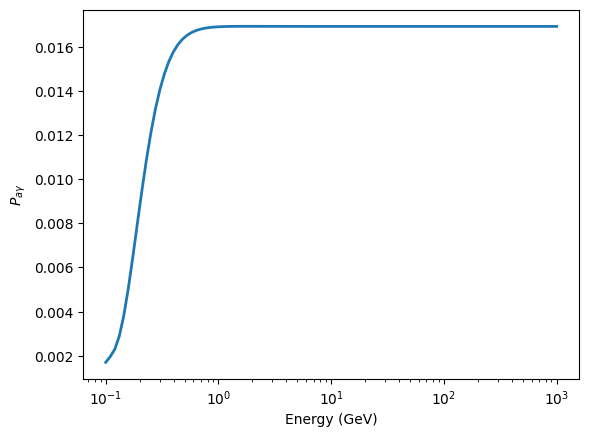

In [17]:
plt.semilogx(EGeV, px[0] + py[0], lw = 2)
plt.xlabel("Energy (GeV)")
plt.ylabel("$P_{a\gamma}$")

#plt.savefig('notebooks/UF23/plots/Application/1convprob_energy.png')
plt.show()